# Correcting probabilities

Shows how to correct readout errors and transform to true probability distribution.

In [12]:
import numpy as np
from qiskit import *
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2
from qiskit.visualization import plot_distribution

In [ ]:
import mthree

## Setup experiment

In [14]:
backend = FakeMelbourneV2()

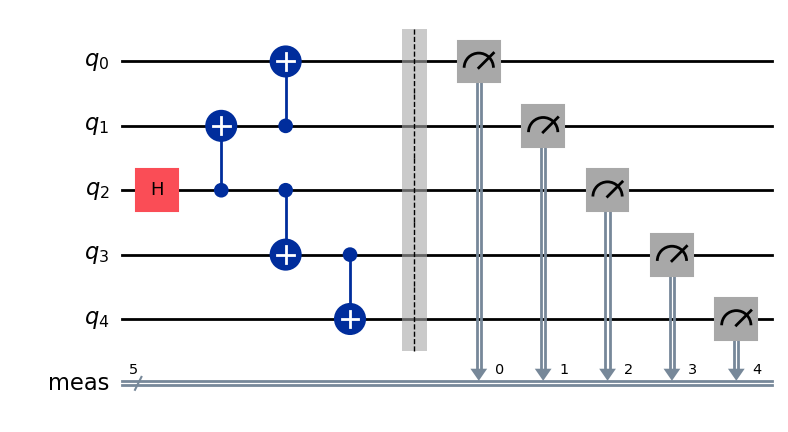

In [15]:
qc = QuantumCircuit(5)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(3,4)
qc.measure_all()
qc.draw('mpl')

## Compile and run circuits and perform mitigation

In [16]:
trans_qc = transpile(qc, backend)

In [17]:
raw_counts = backend.run(trans_qc, shots=2048).result().get_counts()

print(raw_counts)

{'01010': 3, '10110': 2, '01100': 1, '01101': 4, '10100': 2, '01110': 2, '10011': 3, '01011': 4, '01000': 20, '11101': 70, '00000': 905, '00010': 34, '10101': 7, '00001': 22, '11100': 29, '10111': 54, '10010': 1, '10000': 4, '11011': 50, '11001': 10, '01111': 54, '11000': 2, '11111': 649, '00100': 20, '11110': 59, '00101': 3, '11010': 5, '00011': 20, '00111': 9}


In [18]:
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(range(qc.num_qubits))

In [19]:
quasi = mit.apply_correction(raw_counts, range(qc.num_qubits))
probs = quasi.nearest_probability_distribution()

print(probs)

{'11001': np.float32(0.0004433028), '11011': np.float32(0.0019782174), '01111': np.float32(0.0036127146), '00001': np.float32(0.0065234574), '00010': np.float32(0.0076000914), '00011': np.float32(0.008841459), '11100': np.float32(0.012945511), '11110': np.float32(0.014441549), '11101': np.float32(0.01855004), '11111': np.float32(0.44530675), '00000': np.float32(0.47975674)}


## Plot result

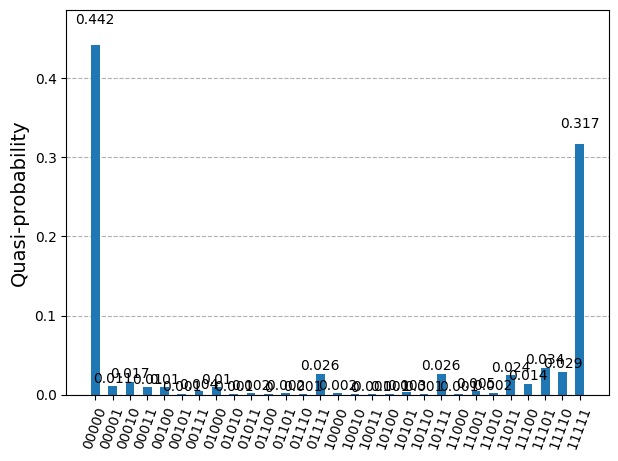

In [20]:
plot_distribution(raw_counts)

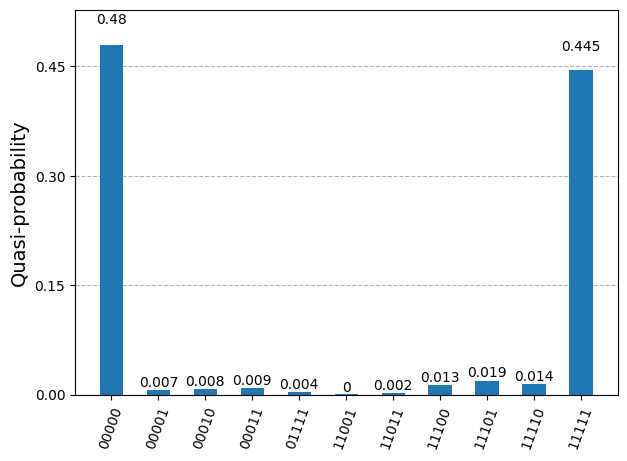

In [21]:
plot_distribution(probs)

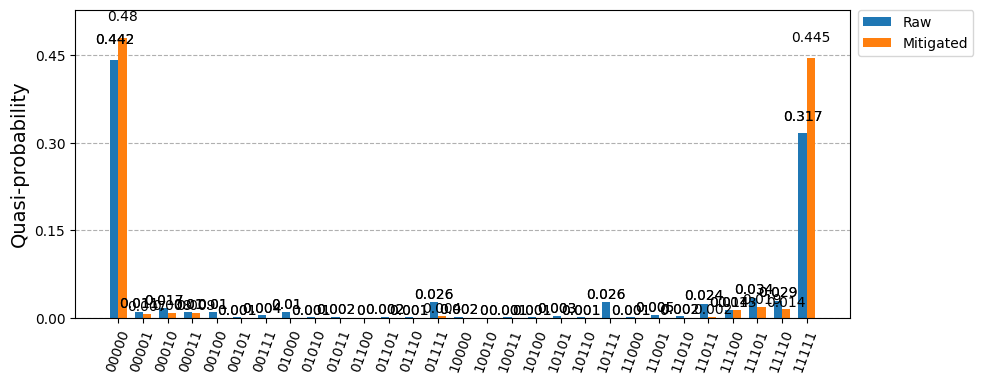

In [22]:
plot_distribution([raw_counts, probs], figsize=(10,4), legend=['Raw', 'Mitigated'])